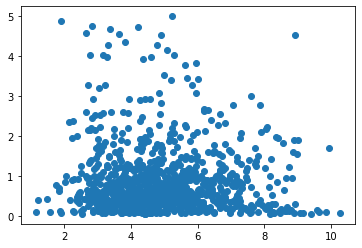

In [2]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import RidgeCV, Ridge, Lasso, LassoCV
from sklearn.model_selection import cross_val_predict, cross_val_score, cross_validate
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

spectra = pd.read_csv('spectra.dat', delimiter=' ', header=None)
wavelengths = pd.read_csv('wavelengths.csv', header=None)
galaxy_properties = pd.read_csv('galaxy_properties.csv', index_col = 0)

ages = galaxy_properties['age']

X = np.empty(len(spectra))
for i in range(len(spectra)):
    X[i] = np.log(np.sum(spectra.loc[i]))

plt.scatter(X, ages)

In [3]:
svr = SVR(verbose=True)
cv = KFold(n_splits=5, shuffle=True, random_state=101)
# l_benchmark_lim = cross_validate(model, spectra, ages, cv = cv, scoring = 'neg_mean_squared_error', return_train_score=True)
# l_benchmark_lim

params = {
    'C': [0.01, 0.1, 1.0, 1, 10],
    'degree': [1, 3, 5, 7],
    'kernel': ['poly', 'rbf'],
}

model = GridSearchCV(svr, params, cv = cv, verbose=5, n_jobs=-3, return_train_score=True, scoring='r2')
model.fit(spectra, ages)

print('Best params, best score:', "{:.4f}".format(model.best_score_), \
      model.best_params_)

l_benchmark_lim = cross_validate(model, spectra, ages, cv = cv, scoring = 'neg_mean_squared_error', return_train_score=True)
print(l_benchmark_lim)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-3)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-3)]: Done   6 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-3)]: Done  60 tasks      | elapsed:   25.6s
[Parallel(n_jobs=-3)]: Done 150 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-3)]: Done 200 out of 200 | elapsed:  5.2min finished


[LibSVM]Best params, best score: 0.1233 {'C': 10, 'degree': 1, 'kernel': 'rbf'}
Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-3)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-3)]: Done   6 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-3)]: Done  60 tasks      | elapsed:   15.9s
[Parallel(n_jobs=-3)]: Done 150 tasks      | elapsed:   55.4s
[Parallel(n_jobs=-3)]: Done 200 out of 200 | elapsed:  1.8min finished


[LibSVM]Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-3)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-3)]: Done   6 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-3)]: Done  60 tasks      | elapsed:   16.0s
[Parallel(n_jobs=-3)]: Done 150 tasks      | elapsed:   53.9s
[Parallel(n_jobs=-3)]: Done 200 out of 200 | elapsed:  2.2min finished


[LibSVM]Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-3)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-3)]: Done   6 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-3)]: Done  60 tasks      | elapsed:   17.2s
[Parallel(n_jobs=-3)]: Done 150 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-3)]: Done 200 out of 200 | elapsed:  3.5min finished


[LibSVM]Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-3)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-3)]: Done   6 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-3)]: Done  60 tasks      | elapsed:   16.4s
[Parallel(n_jobs=-3)]: Done 150 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-3)]: Done 200 out of 200 | elapsed:  4.5min finished


[LibSVM]Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-3)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-3)]: Done   6 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-3)]: Done  60 tasks      | elapsed:   16.9s
[Parallel(n_jobs=-3)]: Done 150 tasks      | elapsed:   51.8s
[Parallel(n_jobs=-3)]: Done 200 out of 200 | elapsed:  3.0min finished


[LibSVM]{'fit_time': array([107.32260013, 134.93027401, 208.08189988, 271.89628887,
       180.62367797]), 'score_time': array([0.15390682, 0.14569712, 0.14914322, 0.15933228, 0.13284302]), 'test_score': array([-0.54191239, -0.47556166, -0.54776137, -0.49769908, -0.90461423]), 'train_score': array([-0.60415655, -0.61230667, -0.58466352, -0.60003894, -0.5033941 ])}


In [12]:
pd.DataFrame.from_dict(model.cv_results_).sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_degree,param_kernel,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
39,0.830941,0.024280,0.188676,0.006342,10,7,rbf,"{'C': 10, 'degree': 7, 'kernel': 'rbf'}",0.203159,1.113614e-01,...,1.232687e-01,6.991575e-02,1,0.097650,0.131748,0.141751,1.299200e-01,0.178214,0.135857,0.025849
37,0.875863,0.037152,0.202777,0.016329,10,5,rbf,"{'C': 10, 'degree': 5, 'kernel': 'rbf'}",0.203159,1.113614e-01,...,1.232687e-01,6.991575e-02,1,0.097650,0.131748,0.141751,1.299200e-01,0.178214,0.135857,0.025849
35,0.972185,0.052863,0.224017,0.029824,10,3,rbf,"{'C': 10, 'degree': 3, 'kernel': 'rbf'}",0.203159,1.113614e-01,...,1.232687e-01,6.991575e-02,1,0.097650,0.131748,0.141751,1.299200e-01,0.178214,0.135857,0.025849
33,0.850412,0.049715,0.185580,0.005008,10,1,rbf,"{'C': 10, 'degree': 1, 'kernel': 'rbf'}",0.203159,1.113614e-01,...,1.232687e-01,6.991575e-02,1,0.097650,0.131748,0.141751,1.299200e-01,0.178214,0.135857,0.025849
31,0.891225,0.054007,0.198980,0.016622,1,7,rbf,"{'C': 1, 'degree': 7, 'kernel': 'rbf'}",0.097834,3.520340e-02,...,3.590847e-02,5.321899e-02,5,0.020741,0.041289,0.055523,3.662859e-02,0.072476,0.045331,0.017535
29,0.882067,0.011180,0.205165,0.007121,1,5,rbf,"{'C': 1, 'degree': 5, 'kernel': 'rbf'}",0.097834,3.520340e-02,...,3.590847e-02,5.321899e-02,5,0.020741,0.041289,0.055523,3.662859e-02,0.072476,0.045331,0.017535
27,0.867810,0.060333,0.198050,0.011170,1,3,rbf,"{'C': 1, 'degree': 3, 'kernel': 'rbf'}",0.097834,3.520340e-02,...,3.590847e-02,5.321899e-02,5,0.020741,0.041289,0.055523,3.662859e-02,0.072476,0.045331,0.017535
25,0.800605,0.007687,0.184476,0.002675,1,1,rbf,"{'C': 1, 'degree': 1, 'kernel': 'rbf'}",0.097834,3.520340e-02,...,3.590847e-02,5.321899e-02,5,0.020741,0.041289,0.055523,3.662859e-02,0.072476,0.045331,0.017535
23,0.803857,0.012056,0.183302,0.002017,1,7,rbf,"{'C': 1.0, 'degree': 7, 'kernel': 'rbf'}",0.097834,3.520340e-02,...,3.590847e-02,5.321899e-02,5,0.020741,0.041289,0.055523,3.662859e-02,0.072476,0.045331,0.017535
21,0.819480,0.015051,0.190270,0.004463,1,5,rbf,"{'C': 1.0, 'degree': 5, 'kernel': 'rbf'}",0.097834,3.520340e-02,...,3.590847e-02,5.321899e-02,5,0.020741,0.041289,0.055523,3.662859e-02,0.072476,0.045331,0.017535


In [6]:
params = {
    'C': [1, 10, 50, 100, 100, 500, 1000],
    'kernel': ['rbf'],
    'gamma': ['auto', 'scale', 0.1, 1.0, 10.0, 100.0]
}

model = GridSearchCV(svr, params, cv = cv, verbose=5, n_jobs=-4, return_train_score=True, scoring='r2')
model.fit(X_train, y_train)

print('Best params, best score:', "{:.4f}".format(model.best_score_), \
      model.best_params_)

Fitting 5 folds for each of 42 candidates, totalling 210 fits


[Parallel(n_jobs=-4)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=-4)]: Done   8 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-4)]: Done  62 tasks      | elapsed:   14.5s
[Parallel(n_jobs=-4)]: Done 152 tasks      | elapsed:   30.7s
[Parallel(n_jobs=-4)]: Done 210 out of 210 | elapsed:   43.2s finished


[LibSVM]Best params, best score: 0.7018 {'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}


In [4]:
params = {
    'C': [600, 700, 800, 900, 1000, 1100, 1200],
    'kernel': ['rbf'],
    'gamma': [0.01, 0.025, 0.05, 0.075, 0.1, 0.25, 0.5, 1.0]
}

model = GridSearchCV(svr, params, cv = cv, verbose=5, n_jobs=-3, return_train_score=True, scoring='r2')
model.fit(X_train, y_train)

print('Best params, best score:', "{:.4f}".format(model.best_score_), \
      model.best_params_)

Fitting 5 folds for each of 56 candidates, totalling 280 fits


[Parallel(n_jobs=-3)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-3)]: Done   6 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-3)]: Done  60 tasks      | elapsed:   16.1s
[Parallel(n_jobs=-3)]: Done 150 tasks      | elapsed:   39.3s
[Parallel(n_jobs=-3)]: Done 280 out of 280 | elapsed:  1.3min finished


[LibSVM]Best params, best score: 0.7025 {'C': 1200, 'gamma': 0.075, 'kernel': 'rbf'}


In [5]:
params = {
    'C': [1000, 1100, 1200, 1250, 1300, 1350, 1400, 1600],
    'kernel': ['rbf'],
    'gamma': [0.01, 0.025, 0.05, 0.055, 0.06, 0.065, 0.07, 0.075, 0.08, 0.085, 0.9, 0.1]
}

model = GridSearchCV(svr, params, cv = cv, verbose=5, n_jobs=-3, return_train_score=True, scoring='r2')
model.fit(X_train, y_train)

print('Best params, best score:', "{:.4f}".format(model.best_score_), \
      model.best_params_)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=-3)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-3)]: Done   6 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-3)]: Done  60 tasks      | elapsed:   16.8s
[Parallel(n_jobs=-3)]: Done 150 tasks      | elapsed:   39.4s
[Parallel(n_jobs=-3)]: Done 276 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-3)]: Done 438 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-3)]: Done 480 out of 480 | elapsed:  2.4min finished


[LibSVM]Best params, best score: 0.7073 {'C': 1300, 'gamma': 0.065, 'kernel': 'rbf'}


In [6]:
params = {
    'C': np.arange(1200, 1500, 10),
    'kernel': ['rbf'],
    'gamma': np.arange(0.02, 0.08, 0.001)
}

model = GridSearchCV(svr, params, cv = cv, verbose=5, n_jobs=-3, return_train_score=True, scoring='r2')
model.fit(X_train, y_train)

print('Best params, best score:', "{:.4f}".format(model.best_score_), \
      model.best_params_)

Fitting 5 folds for each of 1800 candidates, totalling 9000 fits


[Parallel(n_jobs=-3)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-3)]: Done   6 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-3)]: Done  60 tasks      | elapsed:   14.6s
[Parallel(n_jobs=-3)]: Done 150 tasks      | elapsed:   40.0s
[Parallel(n_jobs=-3)]: Done 276 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-3)]: Done 438 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-3)]: Done 636 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-3)]: Done 870 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-3)]: Done 1140 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-3)]: Done 1446 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-3)]: Done 1788 tasks      | elapsed:  8.8min
[Parallel(n_jobs=-3)]: Done 2166 tasks      | elapsed: 10.8min
[Parallel(n_jobs=-3)]: Done 2580 tasks      | elapsed: 13.2min
[Parallel(n_jobs=-3)]: Done 3030 tasks      | elapsed: 15.6min
[Parallel(n_jobs=-3)]: Done 3516 tasks      | elapsed: 18.2min
[Parallel(n_jobs=-3)]: Done 4038 tasks      | ela

[LibSVM]Best params, best score: 0.7084 {'C': 1490, 'gamma': 0.06300000000000004, 'kernel': 'rbf'}
